In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy.stats import linregress

In [2]:
data = pd.read_csv("dog_rates_tweets.csv",parse_dates=['created_at'])
print(data['created_at'].dtype)

object


In [3]:
data['rating'] = data['text'].str.extract(r'(\d+(\.\d+)?)/10')[0].astype(float)

In [4]:
data = data[data['rating'].notna()] # remove rows without fractions, NaN

In [5]:
data = data[data['rating'] < 25] # remove values too large to make sense

In [6]:
def to_timestamp(dt):
    return dt.timestamp()

In [7]:
# the added tweets at the end of the data includes timezone information that affects the parse_dates
# ensure data in 'created_at' are datetime
data['created_at'] = pd.to_datetime(data['created_at'], utc=True, format='ISO8601')

In [8]:
data['timestamp'] = data['created_at'].apply(to_timestamp)

In [17]:
fit = linregress(data['timestamp'],data['rating'])
fit

LinregressResult(slope=1.5000503986105543e-08, intercept=-10.585967528906664, rvalue=0.48846445897655977, pvalue=2.607038813966516e-127, stderr=5.828107193286434e-10, intercept_stderr=0.8806156065948476)

In [10]:
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

In [11]:
fit.slope, fit.intercept

(1.5000503986105543e-08, -10.585967528906664)

In [12]:
data['prediction'].dtypes

dtype('float64')

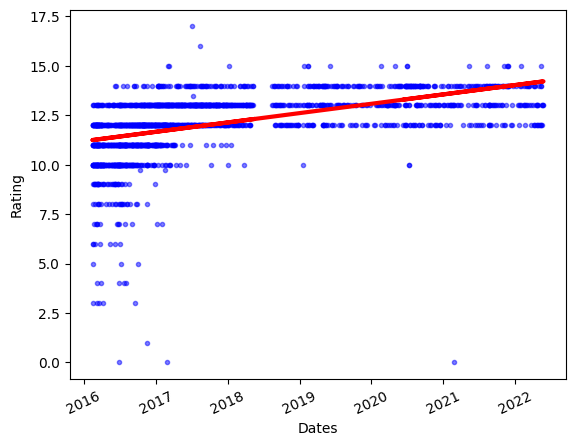

In [13]:
plt.xticks(rotation=25)
plt.plot(data['created_at'],data['rating'],'b.',alpha=0.5)
plt.plot(data['created_at'],data['prediction'],'r-',linewidth=3)
plt.xlabel('Dates')
plt.ylabel('Rating')
plt.show()

In [16]:
# Exercise 7 additional information
# Output the p-value from the regression for the question "is the slope different from zero?"
print(fit.pvalue)
# p-value = 2.6e-127 < 0.05 so we can conclude that the slope is different from zero

2.607038813966516e-127


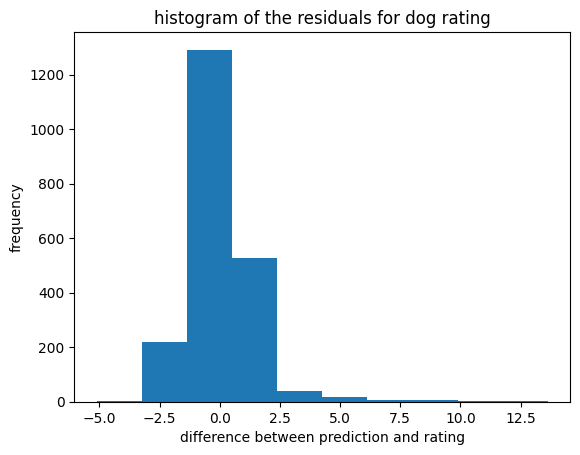

In [23]:
# Plot a histogram of the residuals (observed values minus predicted values)
# the predicted values
plt.hist(data['rating']-data['prediction'])
plt.xlabel('difference between prediction and rating')
plt.ylabel('frequency')
plt.title('histogram of the residuals for dog rating')
plt.savefig('histogram of the residuals for dog ratings')